<h1> AWS and Machine Learning </h1>

> Data Cleaning - Strategies for Missing Values – Remove Observations With Missing Values

GitHub Link: https://github.com/data-analytics-professionals

In [1]:
# Set the Jyputer Notebook, width: 100% 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

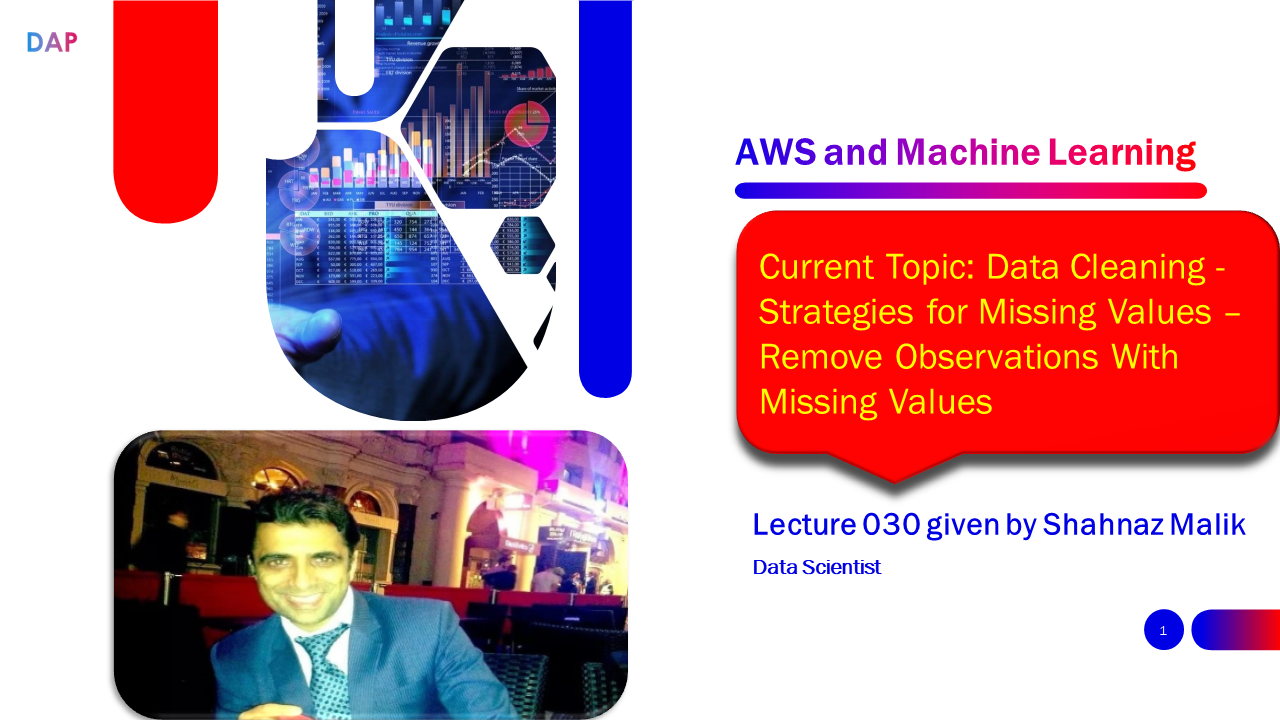

In [2]:
from IPython.display import Image
cover = Image(filename="../project_iris/photos/Strategies_for_Missing_Values_Remove_Observations_With_Missing_Values.png")
display(cover)


"""

Technical knowledge to remember:

I don't condone it, but you could just suppress all warnings with this:

import warnings
warnings.filterwarnings('ignore')

You might have a business reason to use code that you know will raise a warning, such as a deprecated function, but you do not want to see the warning, 
then it is possible to suppress the warning using the catch_warnings context manager as shown below:

"""

In [3]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [4]:
# import jtplot module in notebook
from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='grade3')

# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

# reset default matplotlib rcParams
#jtplot.reset()

In [5]:
# Load the libraries (numpy, pandas) for data analysis and data wrangling
import numpy as np
import pandas as pd

# set jupyter notebook options
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

"""

Iris dataset is modified as some NaNs are added in the observations to allow you to learn and resolve missing values issues that we do face in real-world scenario. The link to the actual Iris Dataset: https://archive.ics.uci.edu/ml/datasets/Iris/

"""

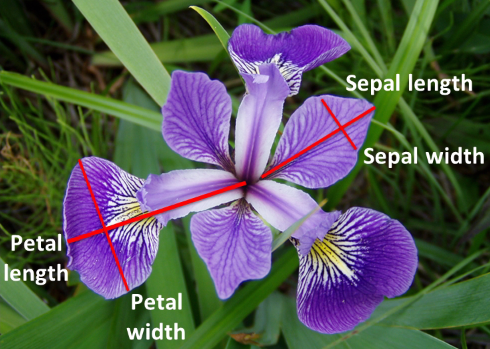

In [6]:
from IPython.display import Image
cover = Image(filename="../project_iris/photos/irisFlower.png")
display(cover)

"""
Real-world datasets do consists missing values. But to build a good machine learning model our dataset should be complete. That’s why we will learn different techniques ranging from deleating missing values to varioue imputation techniques to manage and replace the missing values NaN values with some probable values. 

But before doing that we need to have a good understanding of how the missing values or NaN values are distributed in our dataset. 

"""

In [7]:
# Read a comma-separated values (csv) file into DataFrame (df).
df = pd.read_csv('data/iris.csv')

In [8]:
# Sample function return a random sample of n items from an axis of object.
df.sample(n=10)

,sepal_length,sepal_width,petal_length,petal_width,class
42,4.4,3.2,1.3,0.2,Iris-setosa
49,5.0,NaN,1.4,0.2,Iris-setosa
51,6.4,3.2,4.5,1.5,Iris-versicolor
76,6.8,2.8,4.8,1.4,Iris-versicolor
141,6.9,3.1,5.1,2.3,Iris-virginica
132,6.4,2.8,5.6,2.2,Iris-virginica
20,5.4,3.4,1.7,0.2,Iris-setosa
22,4.6,3.6,1.0,0.2,Iris-setosa
136,6.3,3.4,5.6,2.4,Iris-virginica
91,6.1,3.0,4.6,1.4,Iris-versicolor


In [10]:
# info function prints a concise summary of a DataFrame including the index dtype and column dtypes, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    145 non-null float64
sepal_width     144 non-null float64
petal_length    142 non-null float64
petal_width     148 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


> Visualize Missing Values

In [ ]:
# if you need to install missingno in your system, then please Run the below code without #
#!pip install missingno

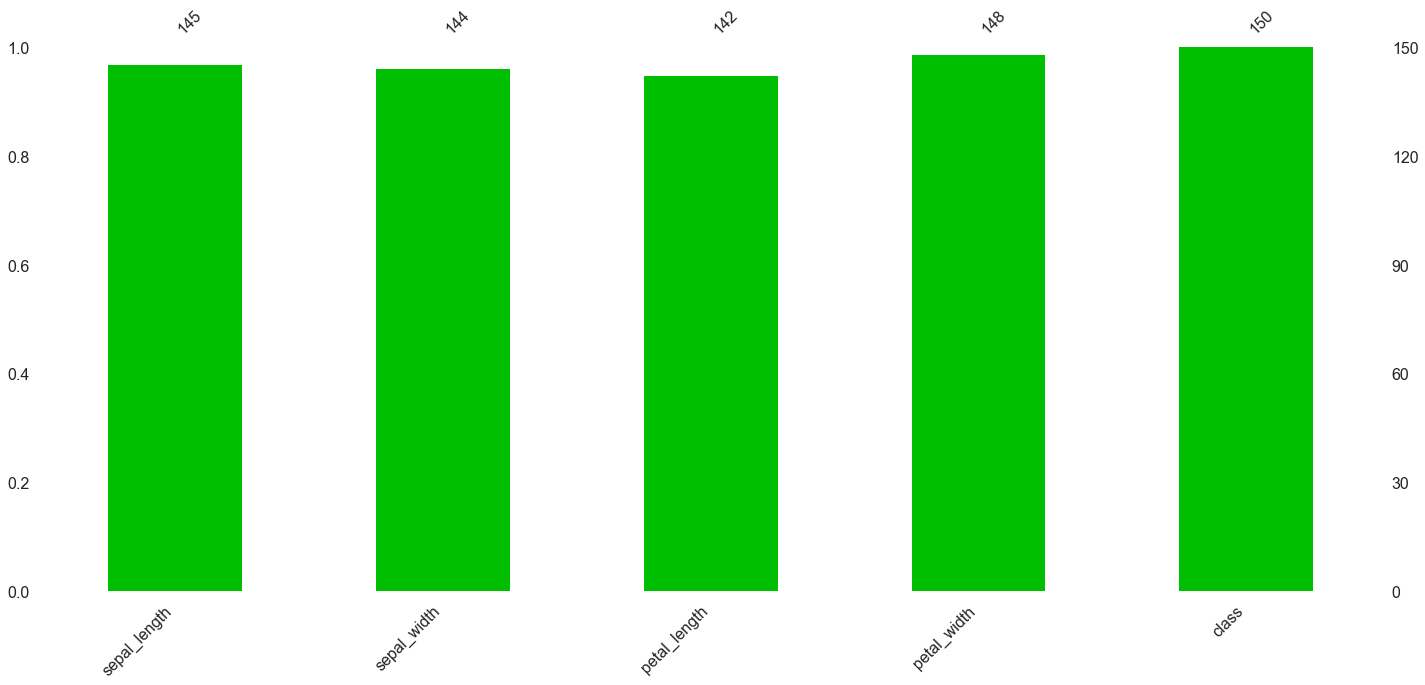

In [11]:
# Load missingno library
import missingno as msno
%matplotlib inline

# Visualize missing values as bar
msno.bar(df, color=(0, 0.75, 0))


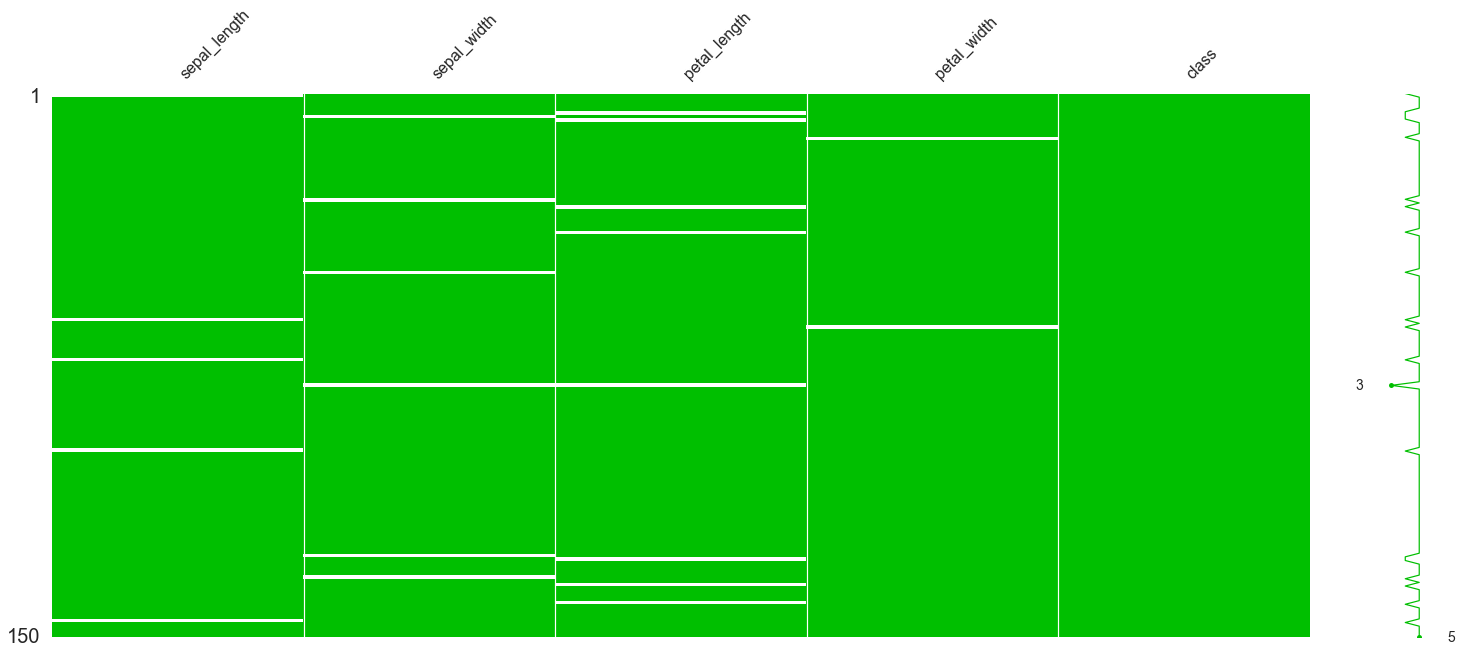

In [12]:
# Visualize missing values using matrix - The msno.matrix nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion.
msno.matrix(df, color=(0, 0.75, 0))

In [13]:
"""
In addition to the heatmap, there is a bar on the right side of this diagram. This is a line plot for each row's data completeness. 
"""

"\nIn addition to the heatmap, there is a bar on the right side of this diagram. This is a line plot for each row's data completeness. \n"

"""
> Heatmap
The missingno correlation heatmap measures nullity correlation: 
how strongly the presence or absence of one variable affects the presence of another:

"""

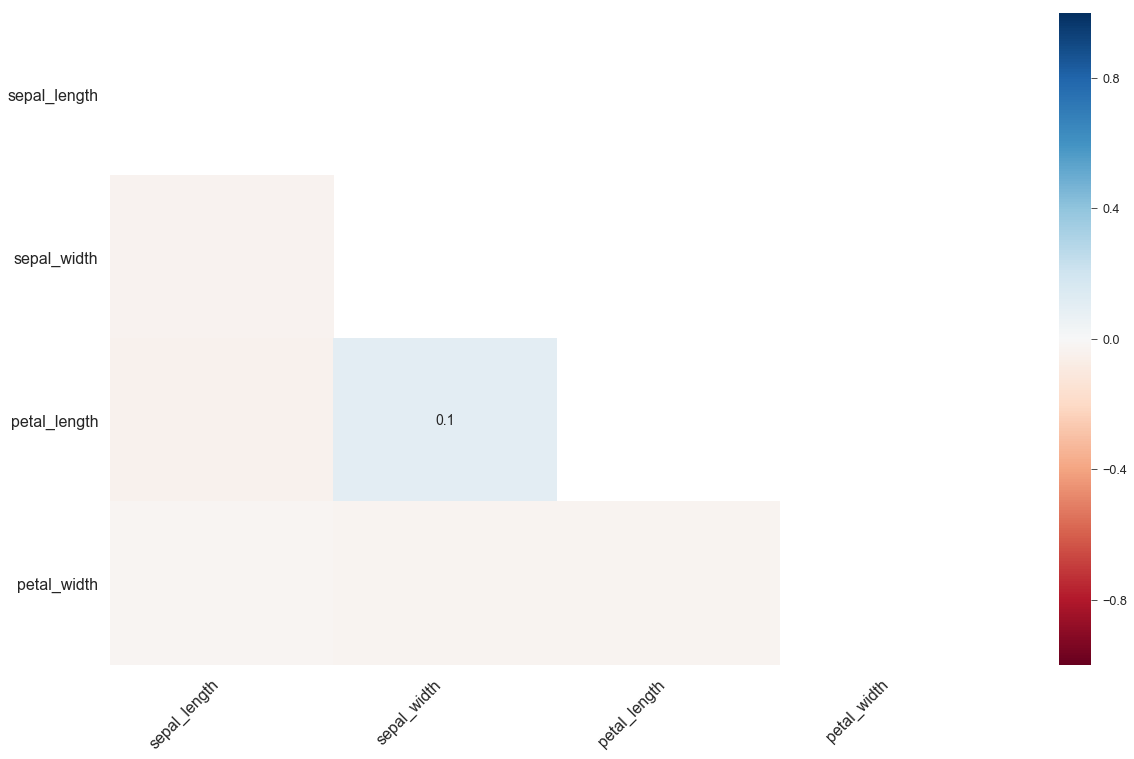

In [15]:
msno.heatmap(df)

"""
> Dendrogram
The dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap:

"""

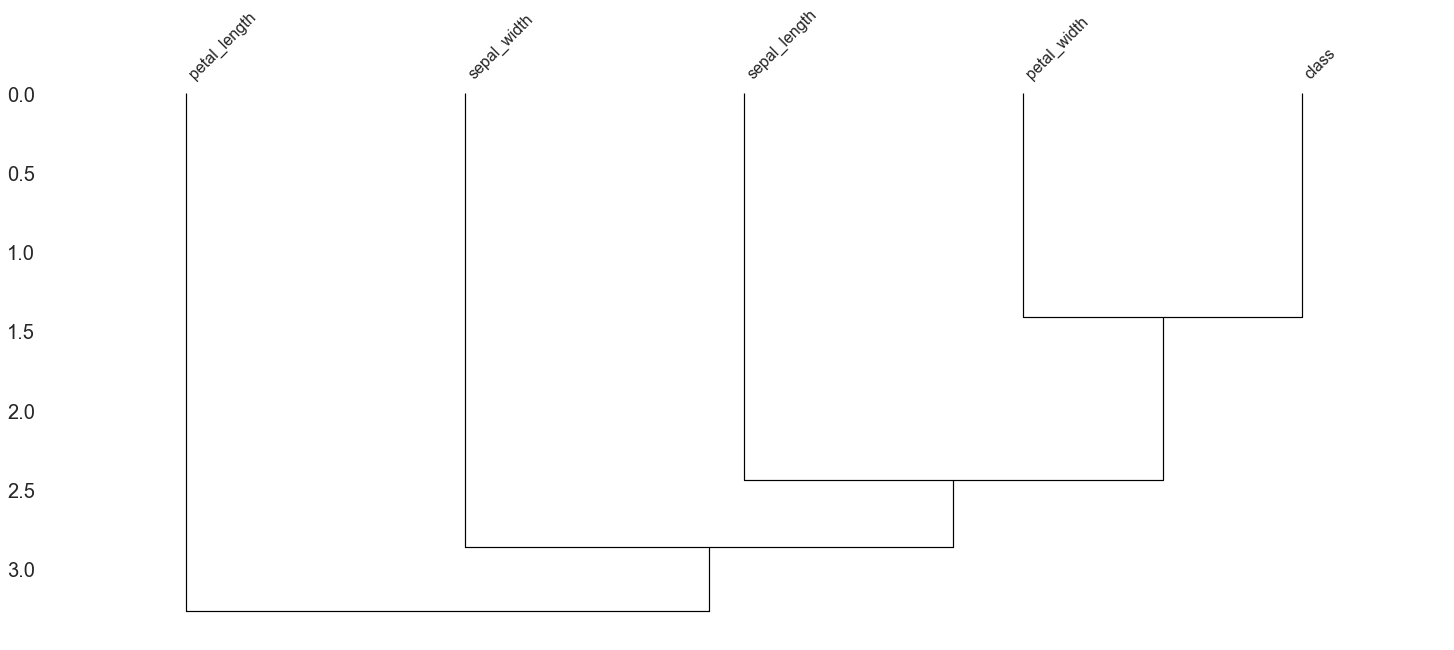

In [16]:
msno.dendrogram(df)

"""
> The dendrogram uses a hierarchical clustering algorithm (courtesy of scipy) to bin variables against one another by their nullity correlation (measured in terms of binary distance). 
> At each step of the tree the variables are split up based on which combination minimizes the distance of the remaining clusters. The more monotone the set of variables, the closer their total distance is to zero, and the closer their average distance (the y-axis) is to zero.

> To interpret above graph, read it from a top-down perspective. Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on. In this specific example the dendrogram glues together the variables which are required and therefore present in every record.

> Cluster leaves which split close to zero, but not at it, predict one another very well, but still imperfectly. If your own interpretation of the dataset is that these columns actually are or ought to be match each other in nullity, then the height of the cluster leaf tells you, in absolute terms, how often the records are "mismatched" or incorrectly filed—that is, how many values you would have to fill in or drop, if you are so inclined.

> Remember: As with matrix, only up to 50 labeled columns will comfortably display in this configuration. However the dendrogram more elegantly handles extremely large datasets by simply flipping to a horizontal configuration.

"""

In [17]:
# innull() function detect missing values and when used with sum() function, it becomes more useful.
df.isnull().sum()

sepal_length    5
sepal_width     6
petal_length    8
petal_width     2
class           0
dtype: int64

In [18]:
# drop  NA/NaN values using the dropna() method.
df = df.dropna()

In [19]:
# innull() function detect missing values and when used with sum() function, it becomes more useful.
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [20]:
# Print a concise summary of a DataFrame df.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 1 to 149
Data columns (total 5 columns):
sepal_length    130 non-null float64
sepal_width     130 non-null float64
petal_length    130 non-null float64
petal_width     130 non-null float64
class           130 non-null object
dtypes: float64(4), object(1)
memory usage: 6.1+ KB


In [21]:
# Write df object to an Excel sheet.
df.to_excel("data/iris_missing_data_deleted.xlsx", sheet_name='iris_dropna')

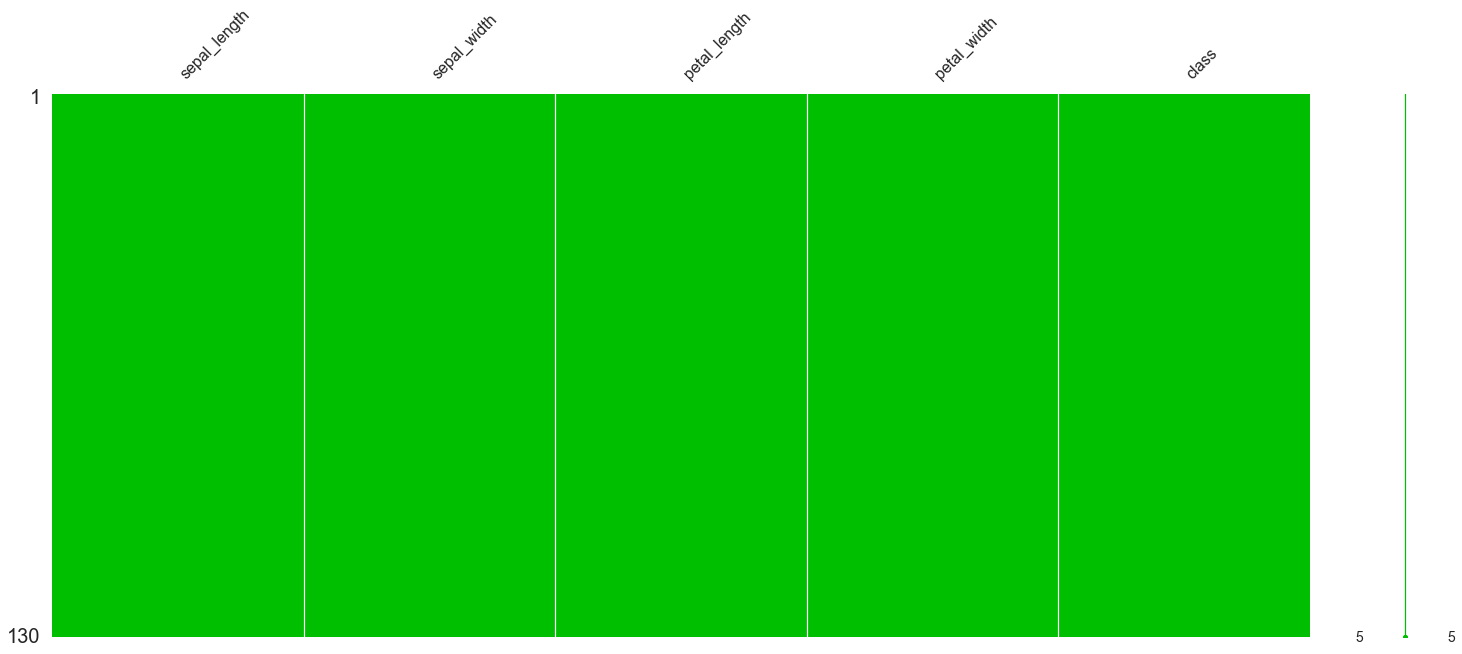

In [22]:
# Visualize missing values using matrix after dropping observations with NaN(s)
msno.matrix(df, color=(0, 0.75, 0))

In [23]:
# info function prints a concise summary of a DataFrame including the index dtype and column dtypes, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 1 to 149
Data columns (total 5 columns):
sepal_length    130 non-null float64
sepal_width     130 non-null float64
petal_length    130 non-null float64
petal_width     130 non-null float64
class           130 non-null object
dtypes: float64(4), object(1)
memory usage: 6.1+ KB
